In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [4]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [5]:
train.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
50011,50012,Male,24,1,14.0,1,< 1 Year,No,28730.0,152.0,91,0
120002,120003,Male,27,1,8.0,1,< 1 Year,No,65990.0,152.0,167,0
372411,372412,Female,25,1,8.0,1,< 1 Year,No,49462.0,152.0,251,0
268614,268615,Female,22,1,47.0,0,< 1 Year,No,36057.0,152.0,266,0
161802,161803,Male,50,1,28.0,0,1-2 Year,Yes,41905.0,26.0,58,0


In [6]:
test.sample(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
10671,391781,Male,64,1,1.0,1,1-2 Year,No,2630.0,156.0,276
4256,385366,Male,41,1,15.0,1,1-2 Year,No,38781.0,124.0,87
527,381637,Male,53,1,28.0,1,1-2 Year,No,2630.0,124.0,212
3454,384564,Male,43,1,28.0,1,1-2 Year,No,22233.0,26.0,116
6140,387250,Female,25,1,36.0,1,< 1 Year,No,31759.0,152.0,36


In [7]:
train.shape

(381109, 12)

In [8]:
test.shape

(127037, 11)

## Checking if any values are missing in train data set

In [9]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### No missing values in train data set

## Numerical Description of the datasets

In [10]:
train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [11]:
numerical = ['Age', 'Previously_Insured', 'Annual_Premium', 'Vintage']

In [12]:
train[numerical].describe()

,Age,Previously_Insured,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.458210,30564.389581,154.347397
std,15.511611,0.498251,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,0.000000,24405.000000,82.000000
50%,36.000000,0.000000,31669.000000,154.000000
75%,49.000000,1.000000,39400.000000,227.000000
max,85.000000,1.000000,540165.000000,299.000000


### Count Plot of Responses

Response being they have taken vehicle insurance or not

0 - Did not buy vehicle insurance \
1 - Bought vehicle insurance

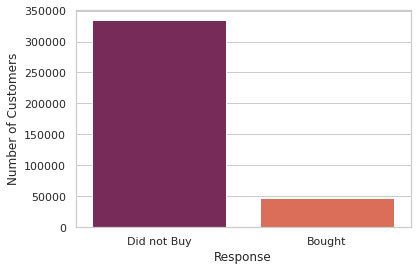

In [13]:
countPlot = sns.countplot(train['Response'], palette="rocket")
countPlot.set_ylabel('Number of Customers')
countPlot.set_xticklabels(['Did not Buy', 'Bought'], rotation=0 )
plt.show(countPlot)

In [14]:
train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

### Distribution Plot of Ages of Customers

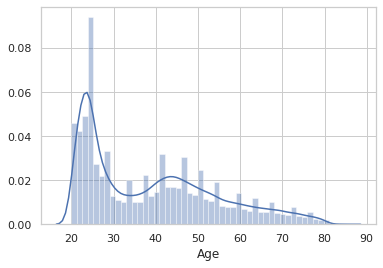

In [15]:
cnp1=sns.distplot(train['Age'])
plt.show(cnp1)

### Finding outliers by Age

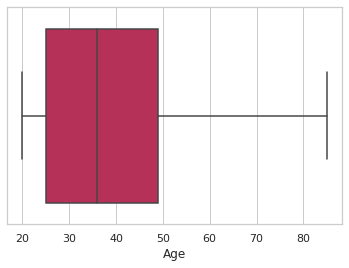

In [16]:
cnp2=sns.boxplot(x='Age', data=train, palette="rocket")
plt.show(cnp2)

## Comparing Age with Annual Premium

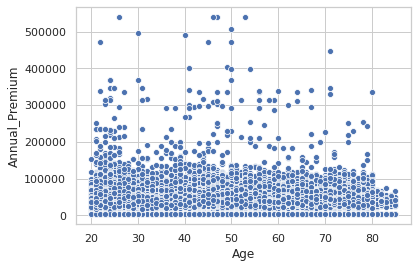

In [17]:
cnp3=sns.scatterplot(x=train['Age'], y=train['Annual_Premium'], palette="rocket")
plt.show(cnp3)

## Comparision By Gender

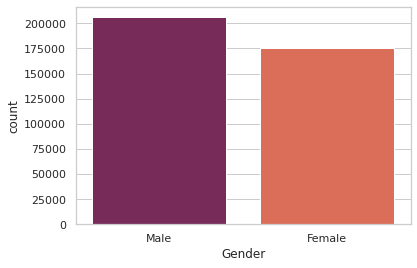

In [18]:
sns.countplot(train['Gender'], palette = "rocket")

In [19]:
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

We have a slightly higher number of males than females in our training dataset

## Comparing their Responses (Responses based on Gender)

In [20]:
df=train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

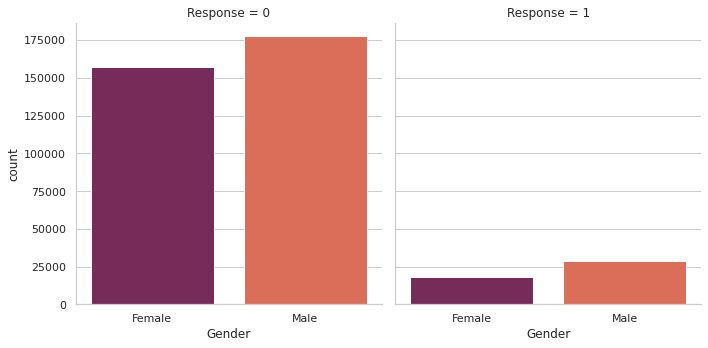

In [21]:
g = sns.catplot(x="Gender", y="count",col="Response",data=df, kind="bar", palette="rocket");

## Comparing Driving licenses by Gender

In [22]:
df=train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

In [23]:
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


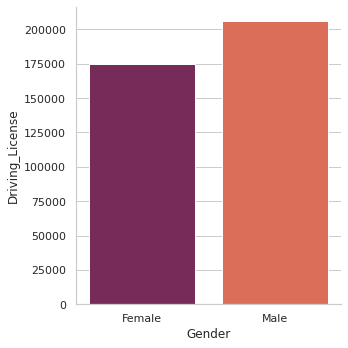

In [24]:
sns.catplot(x="Gender", y="Driving_License", data=df, kind="bar", palette="rocket");

## Customers who already have vehicle insurance

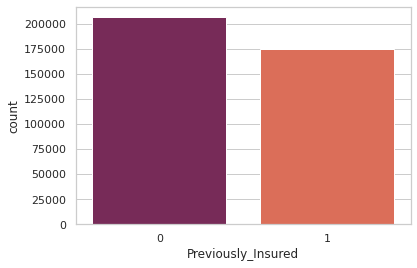

In [35]:
cnp4=sns.countplot(train.Previously_Insured, palette="rocket")
plt.show(cnp4)

## Age of the Vehicle

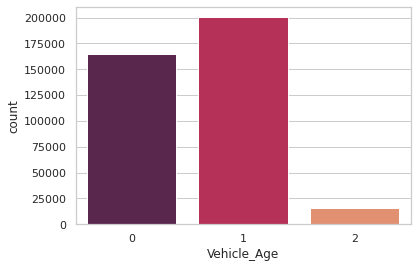

In [36]:
cnp5=sns.countplot(train.Vehicle_Age, palette="rocket")
plt.show(cnp5)

## Response with respect to vehicle age

In [27]:
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


## Number of vehicles damaged

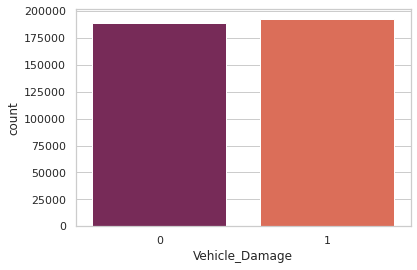

In [37]:
cnp6=sns.countplot(train.Vehicle_Damage, palette="rocket")
plt.show(cnp6)

## Response with respect to vehicle damage

In [29]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Damage,Response,count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


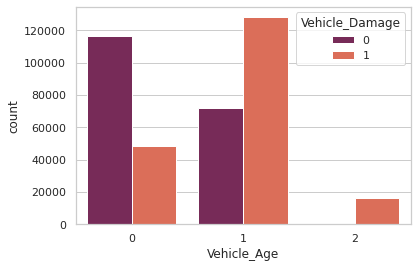

In [39]:
cnp7=sns.countplot('Vehicle_Age',hue='Vehicle_Damage',data=train, palette="rocket")
plt.show(cnp7)

In [40]:
cnp8=sns.countplot('Vehicle_Age',hue='Previously_Insured',data=train, , palette="rocket")
plt.show(cnp8)

SyntaxError: invalid syntax (<ipython-input-40-1e4cadda40c8>, line 1)

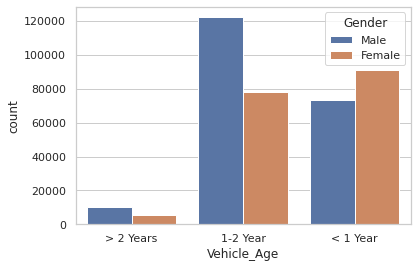

In [32]:
cnp9=sns.countplot('Vehicle_Age',hue='Gender',data=train)
plt.show(cnp9)

In [33]:
train.loc[train['Gender'] == 'Male', 'Gender'] = 1
train.loc[train['Gender'] == 'Female', 'Gender'] = 0
test.loc[test['Gender'] == 'Male', 'Gender'] = 1
test.loc[test['Gender'] == 'Female', 'Gender'] = 0

train.loc[train['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
train.loc[train['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
train.loc[train['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0
test.loc[test['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
test.loc[test['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
test.loc[test['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

train.loc[train['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
train.loc[train['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0
test.loc[test['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
test.loc[test['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

In [34]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0
